# DeepSleep 
## Notas
* En Saola hay periodos que no se va a dormir y se une con el siguiente. Probar si es por el tamaño de los periodos

## v1

- board
- r (run duration)
- ds (deep sleep duration)
- TX (test version)

## T

- Muestra: 240seg
- PowerProfiler freq: 10ms

In [1]:
board="wemosd1"
r = 10
ds = 30
TX = 1

batteries = [0.8, 2, 4, 10] #Ah

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

experiment_name = f"--{board}_r{r}_ds{ds}-T{TX}"
filename = f"../data/dslp{experiment_name}.csv"
print(experiment_name)

--wemosd1_r10_ds30-T1


In [3]:
df = pd.read_csv(filename, parse_dates=["read_at", "timestamp"])

df.columns = ['index','read_at', 'millis', "dt", "v", "a", "w", "v_sh"]
df

,index,read_at,millis,dt,v,a,w,v_sh
0,0,2025-03-04 22:08:24.555795,858531,2025-03-04 22:08:24,5.104,0.0008,0.00408,0.00008
1,1,2025-03-04 22:08:24.566732,858542,2025-03-04 22:08:24,5.104,0.0008,0.00408,0.00008
2,2,2025-03-04 22:08:24.577016,858552,2025-03-04 22:08:24,5.104,0.0008,0.00408,0.00008
3,3,2025-03-04 22:08:24.588934,858564,2025-03-04 22:08:24,5.104,0.0008,0.00408,0.00008
4,4,2025-03-04 22:08:24.599224,858574,2025-03-04 22:08:24,5.104,0.0008,0.00408,0.00008
...,...,...,...,...,...,...,...,...
20939,20939,2025-03-04 22:12:24.507371,36121,2025-03-04 22:12:24,5.104,0.0008,0.00408,0.00008
20940,20940,2025-03-04 22:12:24.519133,36133,2025-03-04 22:12:24,5.104,0.0008,0.00408,0.00008
20941,20941,2025-03-04 22:12:24.530240,36144,2025-03-04 22:12:24,5.104,0.0008,0.00408,0.00008
20942,20942,2025-03-04 22:12:24.542152,36156,2025-03-04 22:12:24,5.104,0.0008,0.00408,0.00008


In [4]:
#remove the trailing data before reset
d = df#[df.millis.idxmin():]
d

,index,read_at,millis,dt,v,a,w,v_sh
0,0,2025-03-04 22:08:24.555795,858531,2025-03-04 22:08:24,5.104,0.0008,0.00408,0.00008
1,1,2025-03-04 22:08:24.566732,858542,2025-03-04 22:08:24,5.104,0.0008,0.00408,0.00008
2,2,2025-03-04 22:08:24.577016,858552,2025-03-04 22:08:24,5.104,0.0008,0.00408,0.00008
3,3,2025-03-04 22:08:24.588934,858564,2025-03-04 22:08:24,5.104,0.0008,0.00408,0.00008
4,4,2025-03-04 22:08:24.599224,858574,2025-03-04 22:08:24,5.104,0.0008,0.00408,0.00008
...,...,...,...,...,...,...,...,...
20939,20939,2025-03-04 22:12:24.507371,36121,2025-03-04 22:12:24,5.104,0.0008,0.00408,0.00008
20940,20940,2025-03-04 22:12:24.519133,36133,2025-03-04 22:12:24,5.104,0.0008,0.00408,0.00008
20941,20941,2025-03-04 22:12:24.530240,36144,2025-03-04 22:12:24,5.104,0.0008,0.00408,0.00008
20942,20942,2025-03-04 22:12:24.542152,36156,2025-03-04 22:12:24,5.104,0.0008,0.00408,0.00008


Text(0.5, 1.0, 'Current')

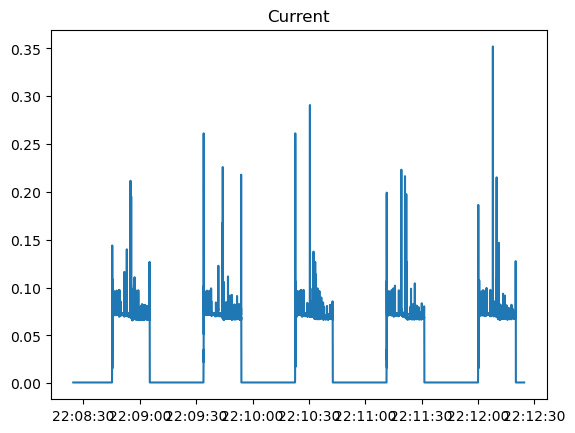

In [5]:
plt.plot(d.read_at, d.a)
plt.title("Current")

Text(0.5, 1.0, 'Voltage')

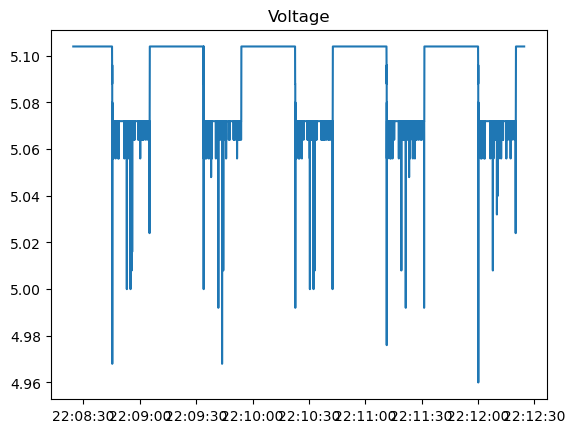

In [6]:
plt.plot(d.read_at, d.v)
plt.title("Voltage")

In [7]:
from scipy import integrate

time_data = (d.read_at - d.read_at.iloc[0]).dt.total_seconds()
current_data = d.a.to_numpy()
total_current = integrate.trapezoid(current_data, time_data)
total_current #A in timespan

np.float64(7.316337410599996)

In [8]:
time_span = max(time_data)
time_span #seg

239.996288

In [9]:
avg_current = total_current / time_span
avg_current #A

np.float64(0.030485210715425714)

## Expected runtime using batteries

In [10]:
for bat_usable_cap in batteries: #Amp hour
    runtime = bat_usable_cap / avg_current
    print(f"At {bat_usable_cap:.02f}Ah:\t{runtime:.01f} hours,\t{runtime/24:.02f} days")

At 0.80Ah:	26.2 hours,	1.09 days
At 2.00Ah:	65.6 hours,	2.73 days
At 4.00Ah:	131.2 hours,	5.47 days
At 10.00Ah:	328.0 hours,	13.67 days
